In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# For NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [6]:
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import resample

In [7]:
# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
data=pd.read_csv(r"C:\Users\NWUUSER\Downloads\kdd\Clean_Dataset.csv", nrows=10000)

In [9]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
data.describe(include='all')

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,10000.00000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,6,267,1,6,3,6,2,1,NaN,NaN,NaN
top,NaN,Vistara,UK-819,Delhi,Evening,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,2933,187,10000,2722,7319,3278,9982,10000,NaN,NaN,NaN
mean,4999.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.526125,25.871100,6062.283100
std,2886.89568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.047044,13.641888,3782.797158
min,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,2281.000000
25%,2499.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330000,14.000000,3102.000000
50%,4999.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.670000,26.000000,5301.000000
75%,7499.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.750000,38.000000,6737.000000


<Axes: xlabel='price'>

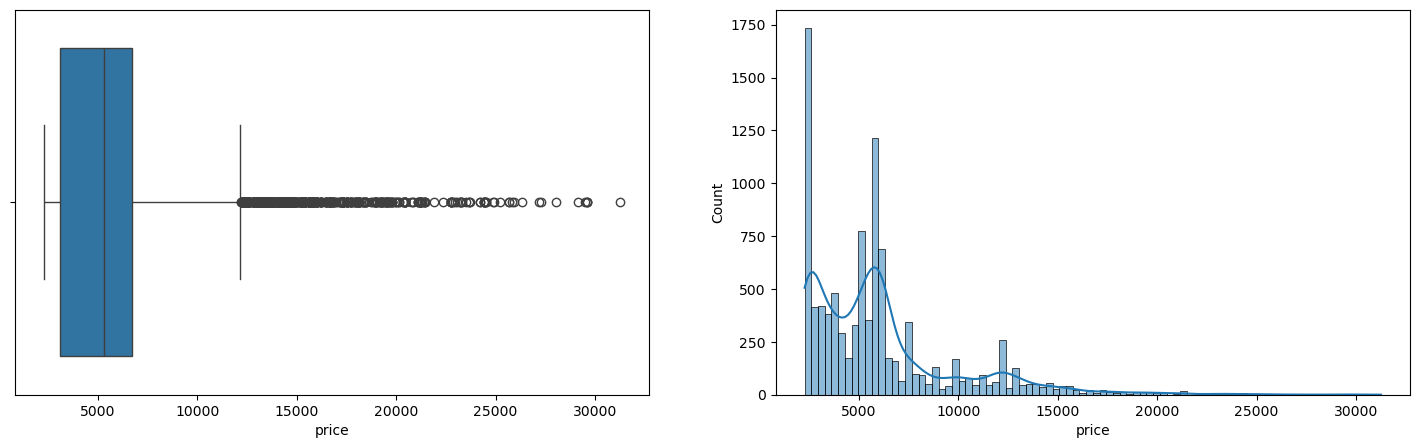

In [106]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)

Text(0.5, 1.0, 'Airline prices based on the class and company')

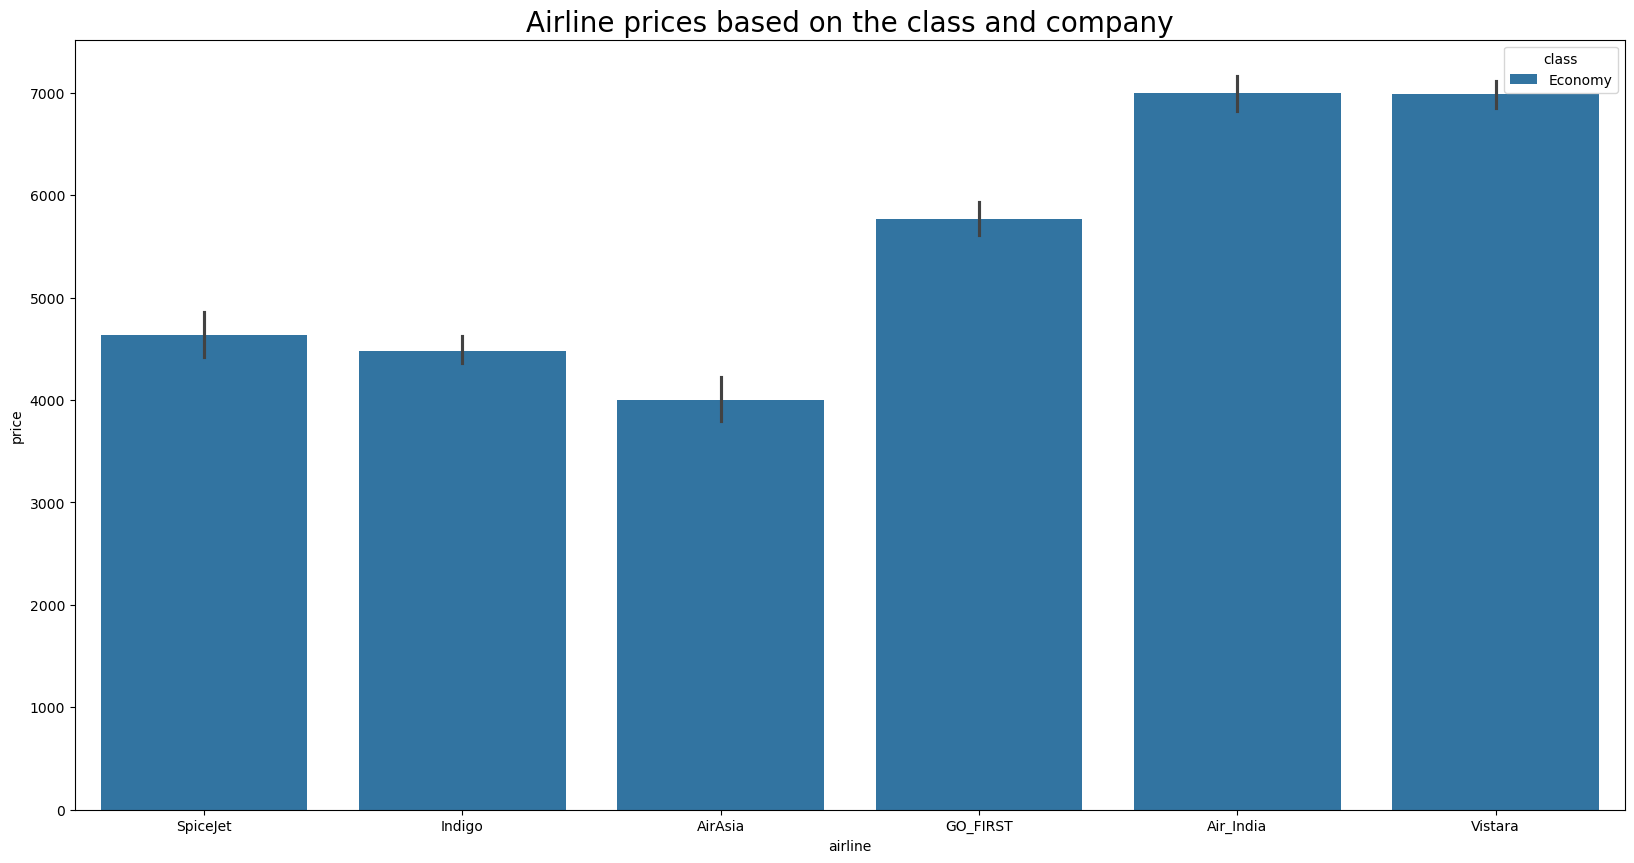

In [107]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=data.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

In [110]:
def preprocessing(data):
    #Encode the ordinal variables "stops" and "class".
    data["stops"] = data["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    data["class"] = data["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(data[dummies_variables], drop_first= True)
    data = pd.concat([data,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    data = data.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return data

In [112]:
data_preprocessed = preprocessing(data)

C:\Users\NWUUSER\AppData\Local\Temp\ipykernel_8432\2470798997.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["stops"] = data["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
C:\Users\NWUUSER\AppData\Local\Temp\ipykernel_8432\2470798997.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["class"] = data["class"].replace({'Economy':0,'Business':1}).astype(int)


In [114]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming data is your DataFrame
data_text = data['price']

# Ensure that all entries in data_text are strings and handle potential NaN values
data_text = data_text.astype(str).fillna("")

# Tokenize
nltk.download('punkt')
def tokenize(text):
    return word_tokenize(text)

tokenized_data = data_text.apply(tokenize)

# Lemmatize
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatized_data = tokenized_data.apply(lemmatize)

# Remove Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

stopwords_removed_data = lemmatized_data.apply(remove_stopwords)

# Convert token lists back to strings
cleaned_data_text = stopwords_removed_data.apply(lambda tokens: ' '.join(tokens))

# Handle completely empty descriptions
empty_docs = cleaned_data_text[cleaned_data_text == ""].count()
cleaned_data_text = cleaned_data_text.replace("", "price")

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=None)
tfidf_matrix = vectorizer.fit_transform(cleaned_data_text)

# Print or Return the outputs
print("Tokenized Data:")
print(tokenized_data.head())

print("\nLemmatized Data:")
print(lemmatized_data.head())

print("\nData after Stopword Removal:")
print(stopwords_removed_data.head())

print("\nTF-IDF Matrix:")
print(tfidf_matrix)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenized Data:
0    [5953]
1    [5953]
2    [5956]
3    [5955]
4    [5955]
Name: price, dtype: object

Lemmatized Data:
0    [5953]
1    [5953]
2    [5956]
3    [5955]
4    [5955]
Name: price, dtype: object

Data after Stopword Removal:
0    [5953]
1    [5953]
2    [5956]
3    [5955]
4    [5955]
Name: price, dtype: object

TF-IDF Matrix:
  (0, 612)	1.0
  (1, 612)	1.0
  (2, 615)	1.0
  (3, 614)	1.0
  (4, 614)	1.0
  (5, 614)	1.0
  (6, 627)	1.0
  (7, 627)	1.0
  (8, 613)	1.0
  (9, 613)	1.0
  (10, 613)	1.0
  (11, 613)	1.0
  (12, 614)	1.0
  (13, 614)	1.0
  (14, 614)	1.0
  (15, 614)	1.0
  (16, 614)	1.0
  (17, 614)	1.0
  (18, 610)	1.0
  (19, 610)	1.0
  (20, 613)	1.0
  (21, 613)	1.0
  (22, 613)	1.0
  (23, 614)	1.0
  (24, 642)	1.0
  :	:
  (9975, 763)	1.0
  (9976, 765)	1.0
  (9977, 798)	1.0
  (9978, 798)	1.0
  (9979, 819)	1.0
  (9980, 819)	1.0
  (9981, 15)	1.0
  (9982, 761)	1.0
  (9983, 762)	1.0
  (9984, 761)	1.0
  (9985, 761)	1.0
  (9986, 761)	1.0
  (9987, 761)	1.0
  (9988, 761)	1.0
  (9989, 761

<Axes: >

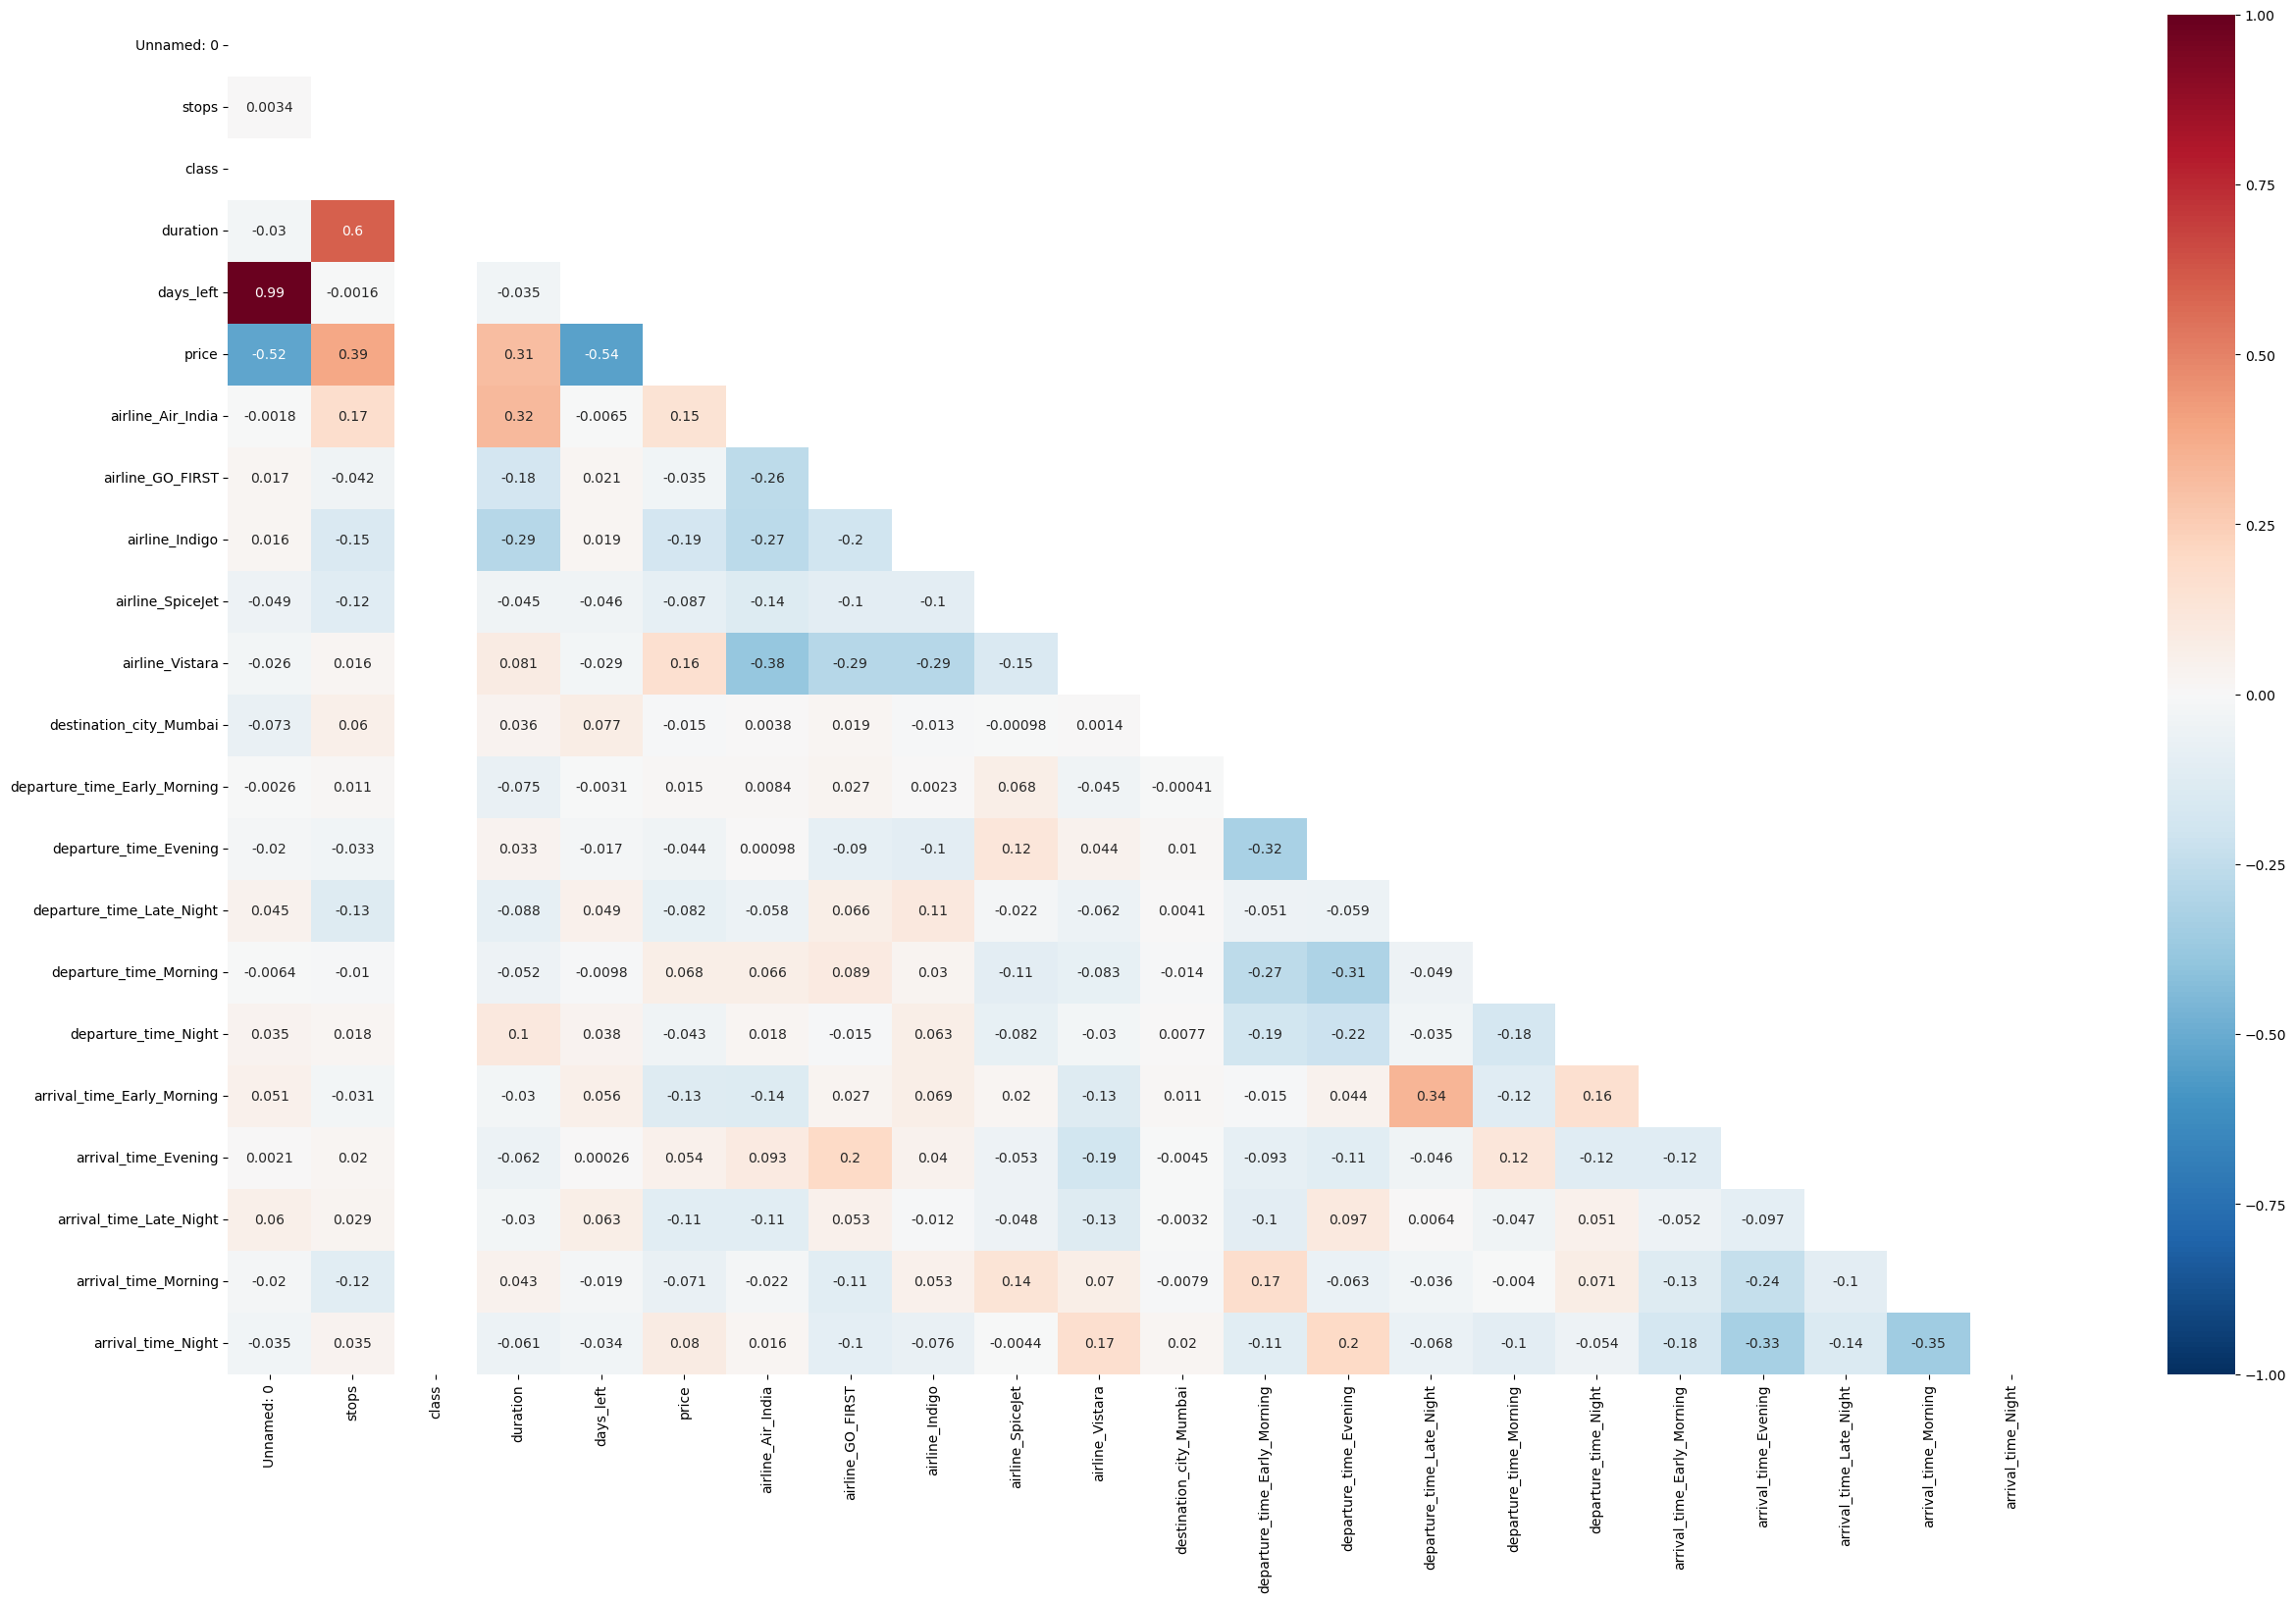

In [116]:
mask = np.triu(np.ones_like(data_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (30,18))
sns.heatmap(data_preprocessed.corr(), mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [117]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data_balanced = pd.read_csv(r"C:\Users\NWUUSER\Downloads\kdd\Clean_Dataset.csv", nrows=10000)

# Convert the 'price' column to strings
data_balanced['price'] = data_balanced['price'].astype(str)

# Check the column type
print(data_balanced['price'].dtype)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Apply TfidfVectorizer
X = vectorizer.fit_transform(data_balanced['price'])
print(f"Shape of the transformed matrix: {X.shape}")

object
Shape of the transformed matrix: (10000, 912)


In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import GaussianNB

# Load the data
data = pd.read_csv(r"C:\Users\NWUUSER\Downloads\kdd\Clean_Dataset.csv",nrows=10000)

# Sample the data to reduce size (if needed)
data_sampled = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Split data into features and target
X = data_sampled.drop(columns='price')  # Replace 'target' with your actual target column
y = data_sampled['price']  # Replace 'target' with your actual target column

# Ensure all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
X = X.fillna(0)  # Replace NaNs with 0 or another appropriate value

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to sparse matrix if the data is sparse
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Initialize classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SGDClassifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    
}

# Store F1 scores
f1_scores = {}

for name, clf in classifiers.items():
    try:
        # Fit the classifier
        clf.fit(X_train_sparse, y_train)
        # Predict on the test set
        y_pred = clf.predict(X_test_sparse)
        # Calculate F1 score
        f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    except MemoryError:
        print(f"MemoryError occurred for {name}")
    except ValueError as e:
        print(f"ValueError occurred for {name}: {e}")

# Output F1 scores
print(f1_scores)


{'RandomForest': 0.1526426883683255, 'SGDClassifier': 0.005185185185185184, 'Support Vector Machine': 0.022464624144817917, 'K-Nearest Neighbors': 0.08379534350553001, 'Decision Tree': 0.19353506480570967}


In [121]:
# Assuming f1_scores is the dictionary containing F1 scores
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"Best model is {best_model_name} with F1 score of {f1_scores[best_model_name]}")


Best model is Decision Tree with F1 score of 0.19353506480570967
